In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test smina (and AmberTools)

Some code is deactivated.<br/>
Now smina is run through by a function

### Needs rdkit>=2020.03.3

In [6]:
import rdkit
assert '2020.03.3' <= rdkit.__version__

In [7]:
from cbiprep.ligand_expo import LigandExpo
from cbiprep.smina import RunSmina, CheckRMSD
from cbiprep.jupyter_utils import draw_mol, check_dir
import pandas as pd
import os, time

In [8]:
lig_expo = LigandExpo()

In [9]:
df = pd.read_pickle('index_2019.pkl.gz')

### SMINA docking as a function

Inputs:
- pdb_code
- ligand_name
- workdir = 'work'
- ncpu = os.cpu_count()
- num_modes = 4
- seed = 0

### SMINA for all PDBs

In [10]:
DF = df[(df['type'] == 'Kd') & (df['lig_ok'] == True) & (df['refined'] == True)]
DF = DF.sort_values(by='pval', ascending=False)

----------------------------------------------------------------------------------------------------
4ffs BIG CCCCSC[C@H]1CN(Cc2c[nH]c3c(N)ncnc23)C[C@@H]1O


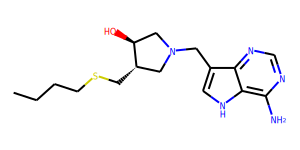

tleap -s -f work/4ffs/4ffs_tleaprc > /dev/null 2>&1
obabel work/4ffs/4ffs_relevant.mol2 -O work/4ffs/4ffs_charged.mol2 > /dev/null 2>&1
smina -r work/4ffs/4ffs_charged.mol2 -l work/4ffs/4ffs_ligand_BIG.sdf --center_x -36.057 --center_y -47.127 --center_z 11.3 --size_x 16.082 --size_y 18.648 --size_z 18.917 --cpu 10 --num_modes 4 --seed 0 -o work/4ffs/4ffs_ligand_BIG_docked.sdf --log work/4ffs/4ffs_BIG_smina.log
1 1.156
2 1.343
3 1.436
4 2.367
Lapse = 13.7s
----------------------------------------------------------------------------------------------------
4wt2 3UD COc1cc(NC(=O)C[C@@]2(C)C[C@H](c3cccc(Cl)c3)[C@@H](c3ccc(Cl)c(F)c3)N([C@H](CS(=O)(=O)C(C)(C)C)C3CC3)C2=O)ccc1C(=O)O


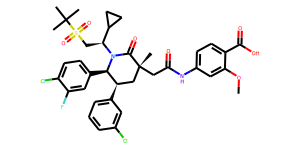

tleap -s -f work/4wt2/4wt2_tleaprc > /dev/null 2>&1
obabel work/4wt2/4wt2_relevant.mol2 -O work/4wt2/4wt2_charged.mol2 > /dev/null 2>&1
smina -r work/4wt2/4wt2_charged.mol2 -l work/4wt2/4wt2_ligand_3UD.sdf --center_x 9.248 --center_y -25.378 --center_z -2.593 --size_x 21.493 --size_y 25.526 --size_z 17.554 --cpu 10 --num_modes 4 --seed 0 -o work/4wt2/4wt2_ligand_3UD_docked.sdf --log work/4wt2/4wt2_3UD_smina.log


In [ ]:
for i in DF.index:
    r = DF.loc[i]
    pdb_code = r['pdb']
    ligand_name = r['lig']
    rmsd_oname = f'work/{pdb_code}/rmsd'
    if os.path.exists(rmsd_oname):
        continue
    print('-'*100)
    start = time.time()
    docked_sdf = RunSmina(pdb_code, ligand_name, ncpu=10)
    with open(rmsd_oname, 'wt') as out:
        for i, rmsd in enumerate(CheckRMSD(pdb_code, ligand_name, docked_sdf), start=1):
            print(i, rmsd)
            print(i, rmsd, file=out)
    lapse = time.time() - start
    print(f'Lapse = {lapse:.1f}s')